In [1]:
import sys
#!{sys.executable} -m pip install datasets
import time
import datasets
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import anndata as ad
import scanpy as sc

In [44]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.19.5 scipy==1.6.0 pandas==1.1.5 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8


In [3]:
mnist = datasets.load_dataset('mnist')
m_train = 60000
train_data = np.array([np.asarray(i).ravel() for i in mnist["train"][:m_train]["image"]], dtype=np.float32)
train_labels = np.array(mnist["train"][:m_train]["label"])

Found cached dataset mnist (/var/cache/user/muellert/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
## Print out the dimensions
print(f"Training dataset dimensions:\t {train_data.shape}")
print(f"Number of training labels:\t {train_labels.shape[0]}")

Training dataset dimensions:	 (60000, 784)
Number of training labels:	 60000


<Figure size 400x400 with 0 Axes>

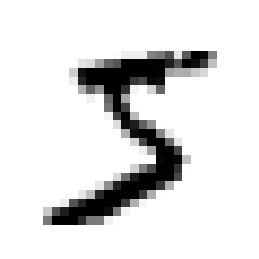

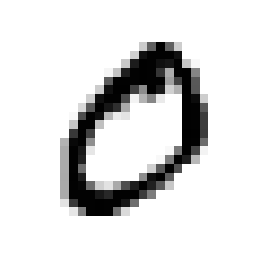

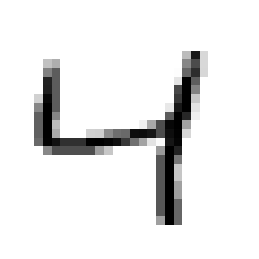

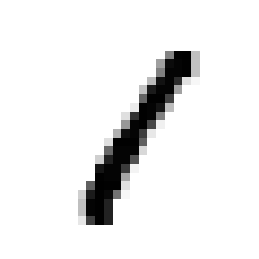

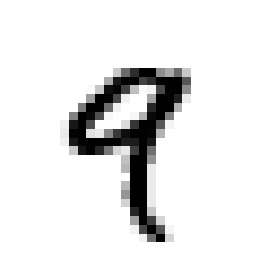

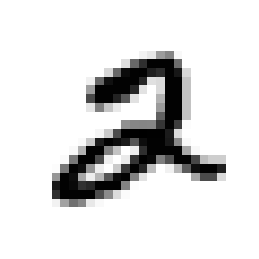

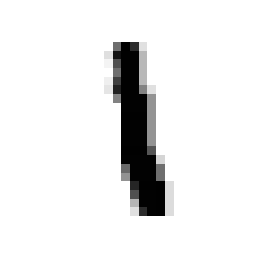

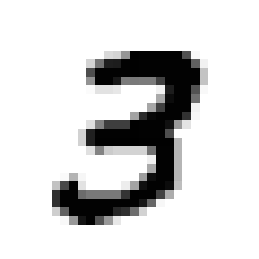

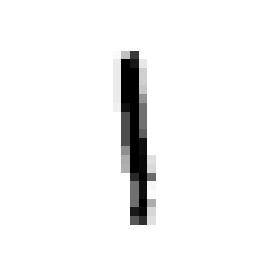

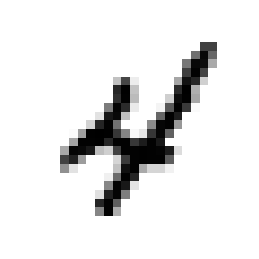

In [46]:
def show_digit(x):
    plt.figure(dpi=40)
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray_r)
    plt.show()
for i in range(10):
    show_digit(train_data[i])

In [6]:
X = train_data.T
obs = [f"pic {i}" for i in range(len(X))]
var = [i for i in range(len(X[0]))]

In [7]:
print(X.shape)
print(len(obs))
print(len(var))

(784, 60000)
784
60000


In [8]:
adata = ad.AnnData(X, obs=obs, var=var, dtype='int32')
adata = adata.T

In [9]:
adata

AnnData object with n_obs × n_vars = 60000 × 784
    obs: 0
    var: 0

In [10]:
train_labels = [f"N. {i}" for i in train_labels]

In [11]:
adata.obs['labels'] = train_labels

In [12]:
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)

In [14]:
adata.raw = adata

In [45]:
sc.pp.pca(adata)
#sc.pl.pca_variance_ratio(adata, log=False, n_pcs=50 )
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")
plt.figure(dpi=100)

computing PCA
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:35)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:15)


<Figure size 400x400 with 0 Axes>

/home/muellert/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 400x400 with 0 Axes>

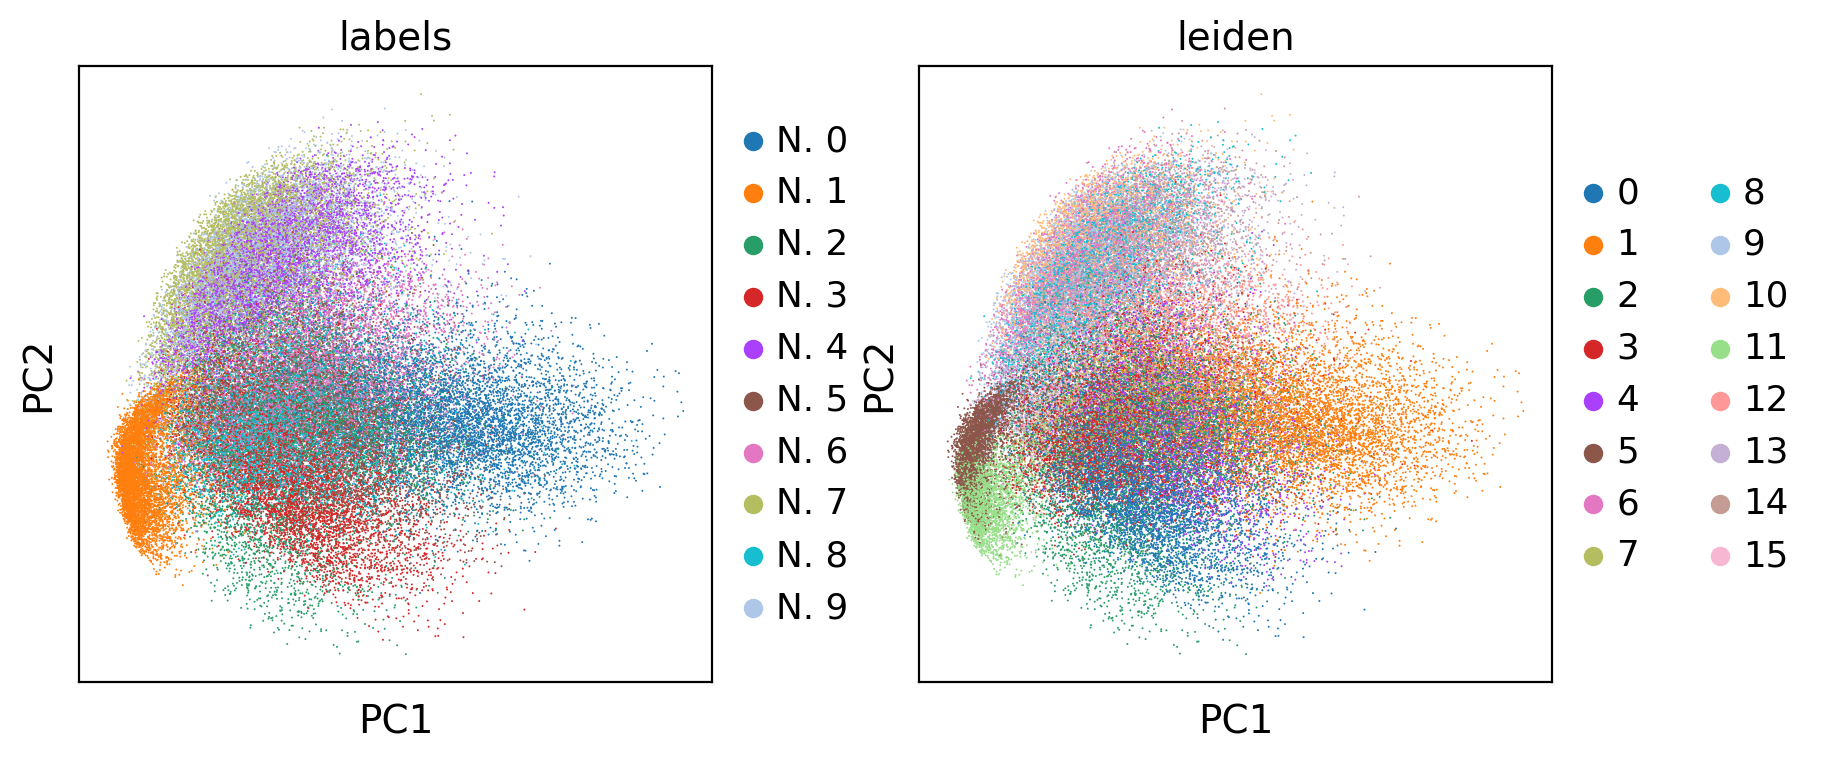

In [16]:
sc.pl.pca(adata, color=["labels", "leiden"])

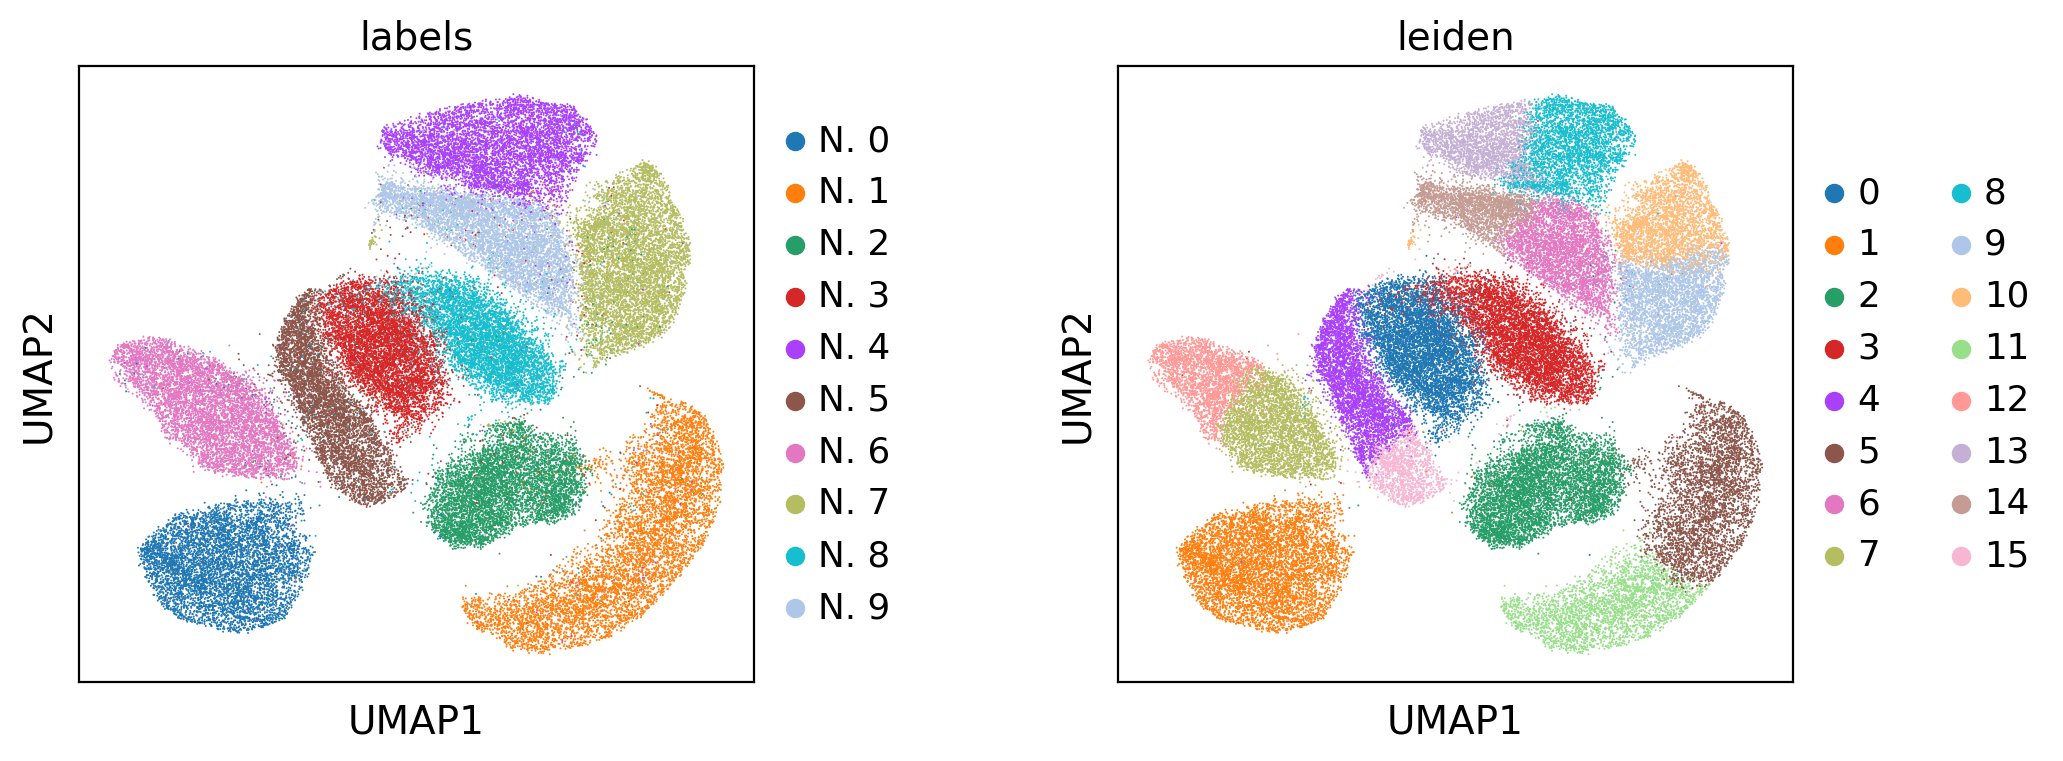

In [17]:
sc.pl.umap(adata, color=["labels", "leiden"], wspace=0.4)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


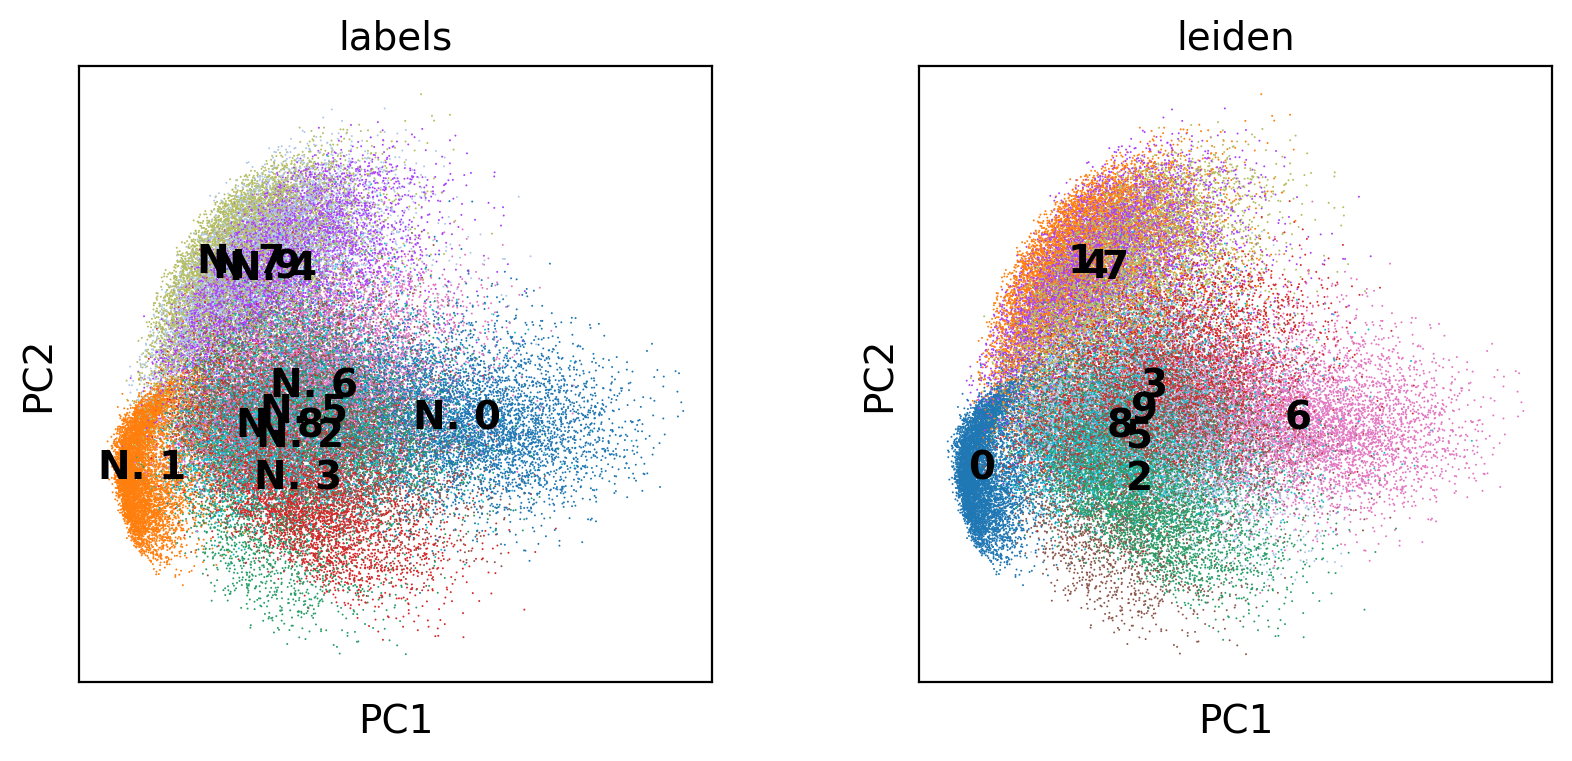

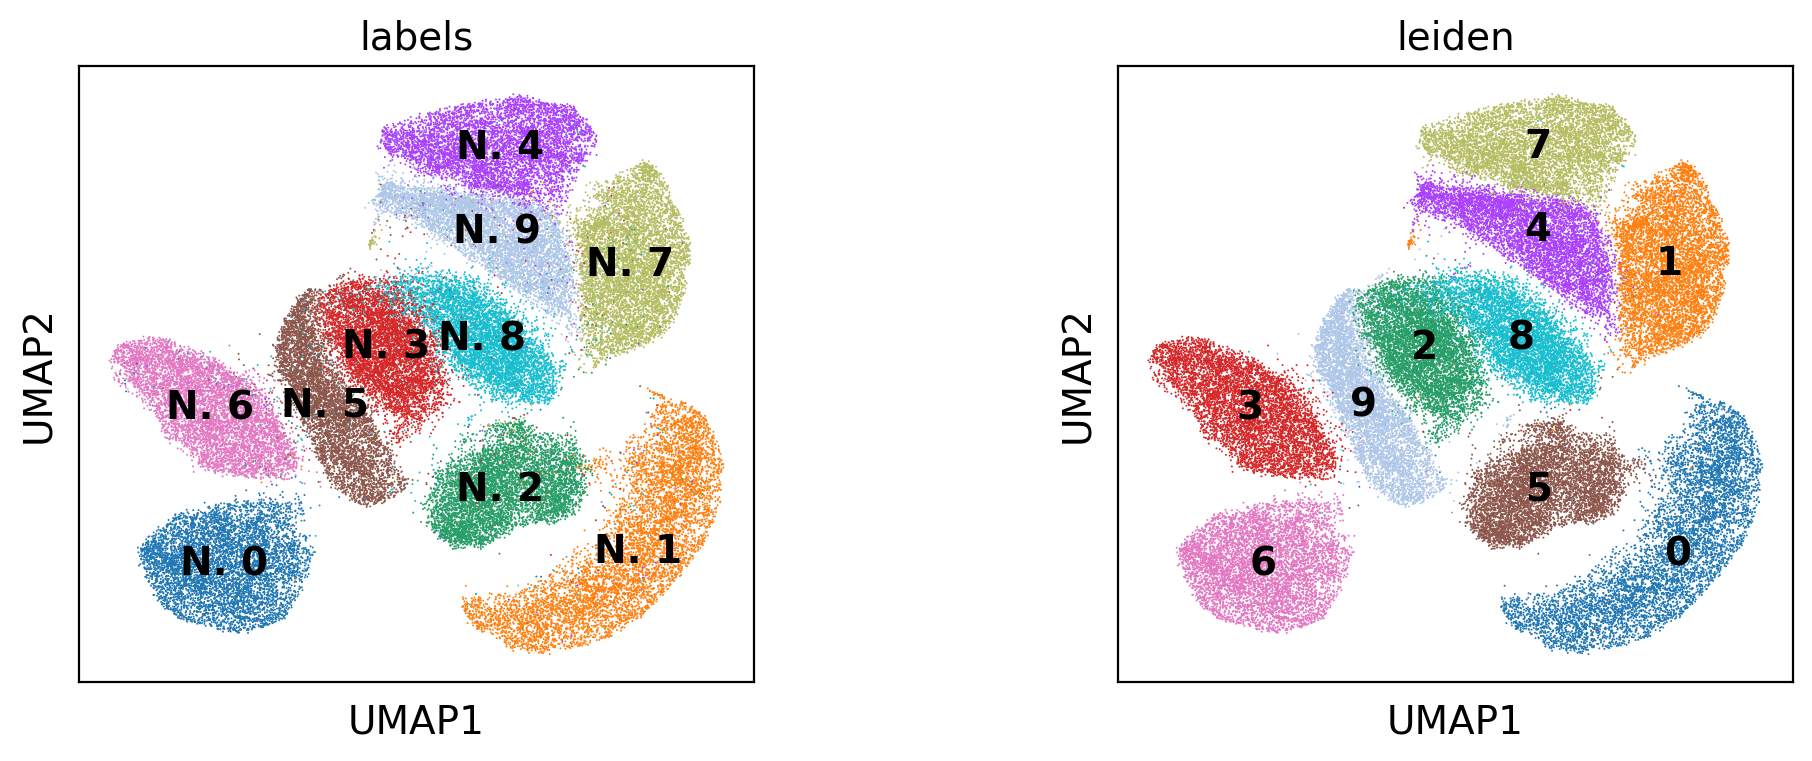

In [20]:
sc.tl.leiden(adata, key_added="leiden" , resolution = 0.3)
sc.pl.pca(adata, color=["labels", "leiden"],legend_loc='on data')
sc.pl.umap(adata, color=["labels", "leiden"],legend_loc='on data', wspace=0.4)

In [21]:
new_cluster_names = [
    'L. 1', 'L. 7',
    'L. 3', 'L. 6',
    'L. 9', 'L. 2',
    'L. 0', 'L. 4',
    'L. 8', 'L. 5']
adata.rename_categories('leiden', new_cluster_names)

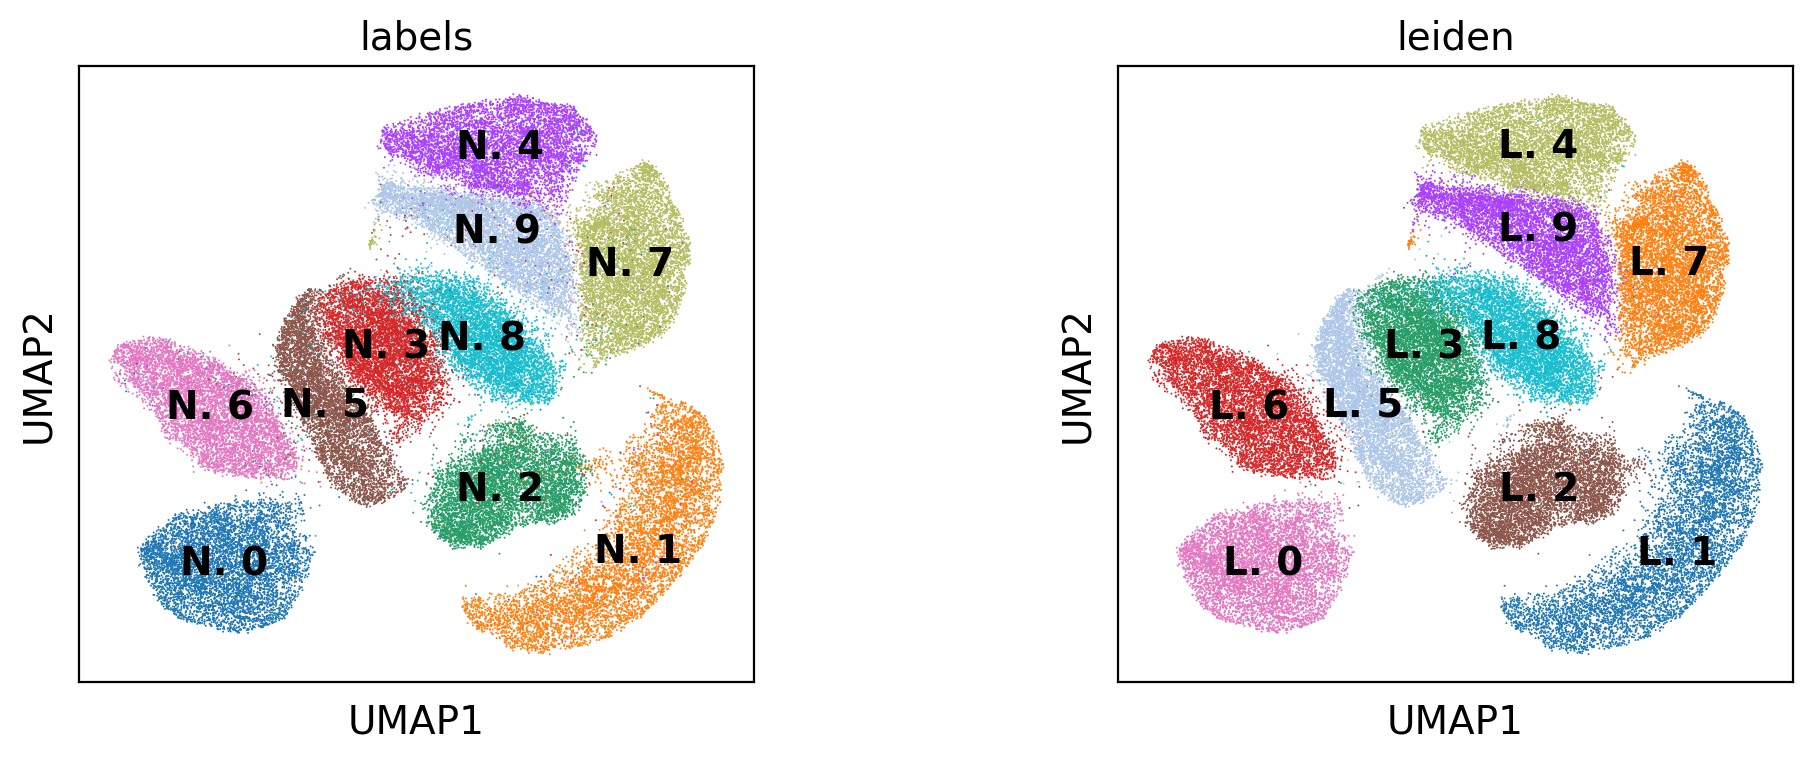

In [22]:
sc.pl.umap(adata, color=["labels", "leiden"],legend_loc='on data', wspace=0.4)

In [23]:
leiden_fit = adata.obs["leiden"]
leiden_list = [int(i[3]) for i in leiden_fit]
label = adata.obs["labels"]
label_list = [int(i[3]) for i in label]
true = 0
false = 0
for i, j in enumerate(label_list):
    if j == leiden_list[i]:
        true += 1
    else:
        false += 1

print(f"Fitting error is {round( false / (false + true)*100, 8)} %")


Fitting error is 2.67666667 %


computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:03:55)


/home/muellert/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


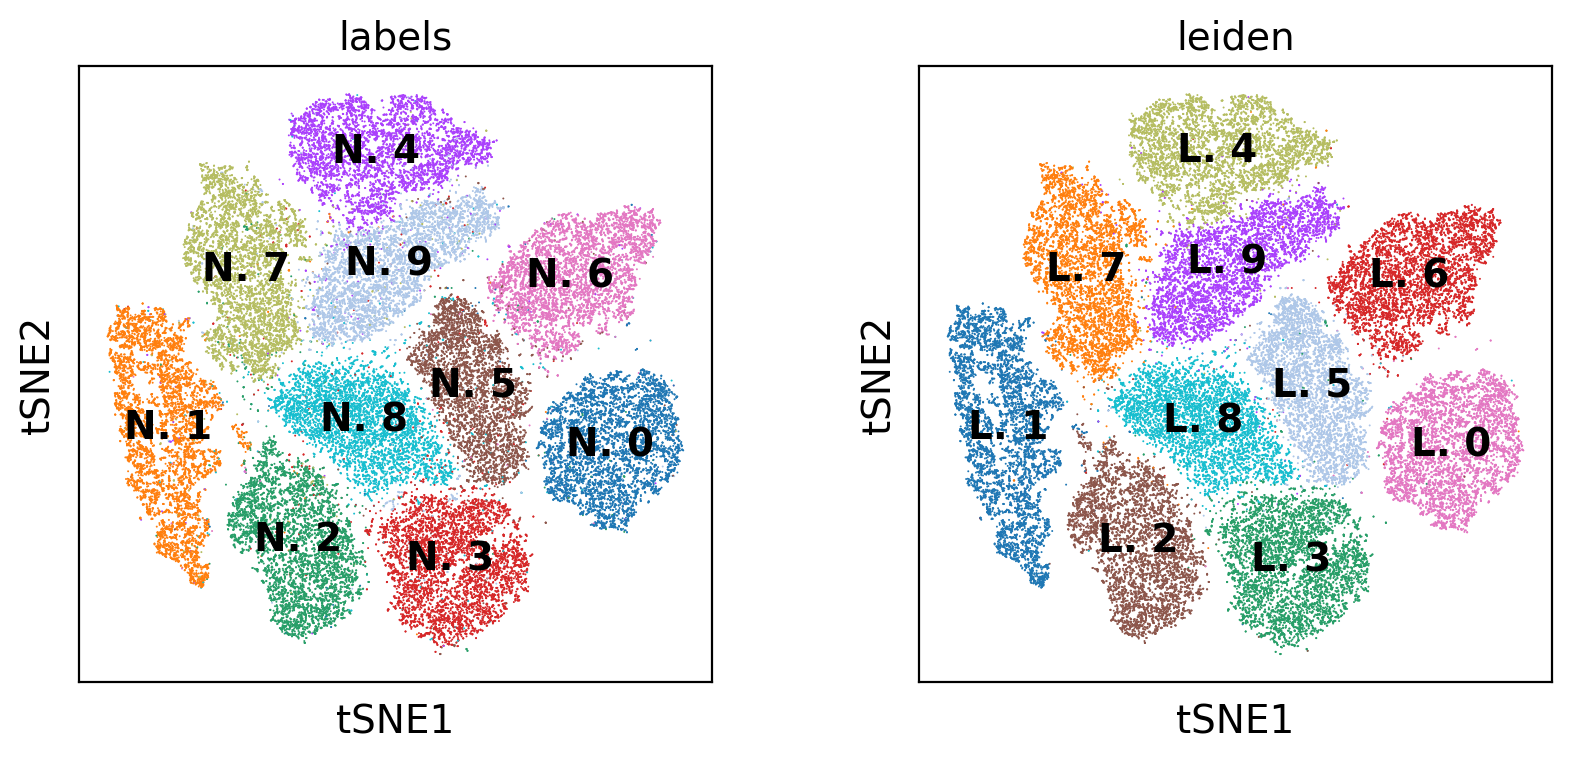

In [24]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=["labels", "leiden"],legend_loc='on data')

In [25]:
df = pd.DataFrame(adata.raw.X)
df

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       777  778  779  780  781  782  783  
0        0    0    0    0    0    0    0  
1        0    0    0    0    0    0    0  
2        0    0    0    0    0    0    0  
3        0    0    0    0    0    0    0  
4        0    0    0    0    0    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
59995    0    0    0    0    0    0    0  
59996    0    0    0    0    0    0    0  
59997    0    0    0    0    0    0    0  
59998    0    0    0    0    0    0    0  
59999    0    0    0    0    0    0    0  

[60000 rows x 784 columns]

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# extract pca coordinates
X_data = adata.raw.X
X_pca = adata.obsm["X_pca"]
X_umap = adata.obsm["X_umap"]
X_tsne = adata.obsm["X_tsne"]

# kmeans with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_data) 
kmeans_pca = KMeans(n_clusters=10, random_state=0).fit(X_pca) 
kmeans_umap = KMeans(n_clusters=10, random_state=0).fit(X_umap) 
kmeans_tsne = KMeans(n_clusters=10, random_state=0).fit(X_tsne) 

adata.obs['kmeans_labels'] = kmeans.labels_.astype(str)
adata.obs['kmeans_pca_labels'] = kmeans_pca.labels_.astype(str)
adata.obs['kmeans_umap_labels'] = kmeans_umap.labels_.astype(str)
adata.obs['kmeans_tsne_labels'] = kmeans_tsne.labels_.astype(str)

/home/muellert/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/muellert/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/muellert/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/muellert/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
adata.obs

0 labels leiden kmeans_labels kmeans_pca_labels kmeans_umap_labels  \
0          0   N. 5   L. 5             5                 4                  1   
1          1   N. 0   L. 0             2                 7                  3   
2          2   N. 4   L. 4             1                 2                  5   
3          3   N. 1   L. 1             0                 6                  6   
4          4   N. 9   L. 9             6                 9                  5   
...      ...    ...    ...           ...               ...                ...   
59995  59995   N. 8   L. 8             5                 4                  9   
59996  59996   N. 3   L. 3             5                 4                  4   
59997  59997   N. 5   L. 5             5                 4                  1   
59998  59998   N. 6   L. 6             9                 5                  7   
59999  59999   N. 8   L. 8             0                 6                  9   

      kmeans_tsne_labels  
0                      4  
1                      7  
2                      6  
3                      3  
4                      9  
...                  ...  
59995                  8  
59996                  2  
59997                  4  
59998                  0  
59999                  8  

[60000 rows x 7 columns]

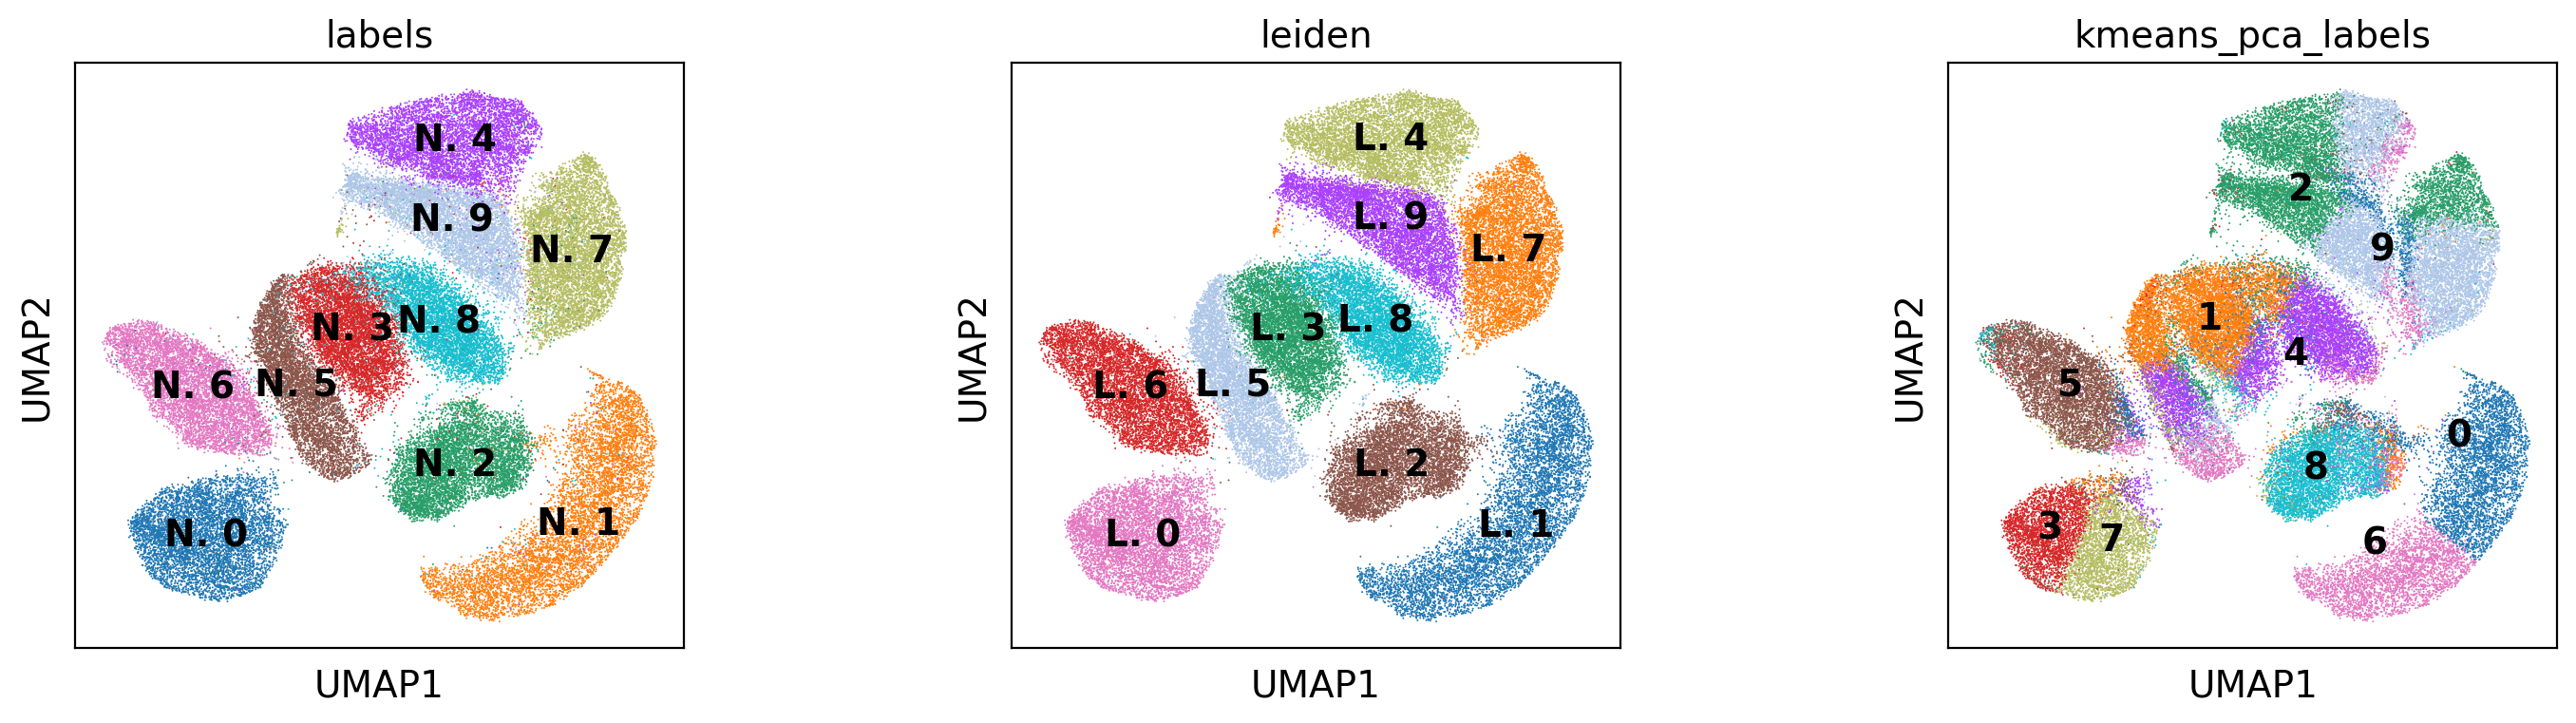

In [43]:
sc.pl.umap(adata, color=["labels", "leiden", "kmeans_pca_labels"],legend_loc='on data', wspace=0.4)

In [41]:
def fehler(string):
    fit = adata.obs[string]
    label = adata.obs["labels"]
    label_list = [int(i[3]) for i in label]
    if string=="leiden" or string=="labels":
        _list = [int(i[3]) for i in fit]
    else:
        _list = [int(i[0]) for i in fit]
    true = 0
    false = 0
    for i, j in enumerate(label_list):
        if j == _list[i]:
            true += 1
        else:
            false += 1
    print(f"{string} fitting error is {round( false / (false + true)*100, 8)} %")


In [42]:
for i in ["labels", "leiden", "kmeans_pca_labels", "kmeans_umap_labels","kmeans_tsne_labels"]:
    fehler(i)

labels fitting error is 0.0 %
leiden fitting error is 2.67666667 %
kmeans_pca_labels fitting error is 94.84833333 %
kmeans_umap_labels fitting error is 98.18 %
kmeans_tsne_labels fitting error is 83.61833333 %
